<a href="https://colab.research.google.com/github/KarolineCostadaSilva/curso_fotografia_computacional/blob/main/Semana%202/Exerc%C3%ADcio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Em processamento de imagens coloridas, faça a segmentação do bico da ave na imagem abaixo (pode ser obtida no github: https://github.com/kevinruiz182/image_processing_tools/tree/main/images/color_image_processing) usando as cores no espaço RGB: (R,G,B). Use a distância euclidiana (através da raiz quadrada da soma dos quadrados das diferenças de cada canal de cor respectivo) para determinar a diferença entre as cores dos pixels da imagem e o pixel amarelo, determinado por (255,255,0). Considere cada pixel como um vetor e o range de cada canal sendo de 0 a 255.  Seja a distância de limiar a mesma distância entre os pixels: (0,0,0) e (100,100,100).

Qual a média dos valores de distância dos pixels, dentro dessa região de limiar, para a cor (255,255,0),  aproximadamente?

In [ ]:
import os
if os.path.isdir("imgcourse"):
  print("Diretório já existe!")
else:
  !git clone https://github.com/kevinruiz182/image_processing_tools/


Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 20.38 MiB/s, done.
Resolving deltas: 100% (15/15), done.


Mean distance within threshold: 123.38430786132812


(-0.5, 718.5, 898.5, -0.5)

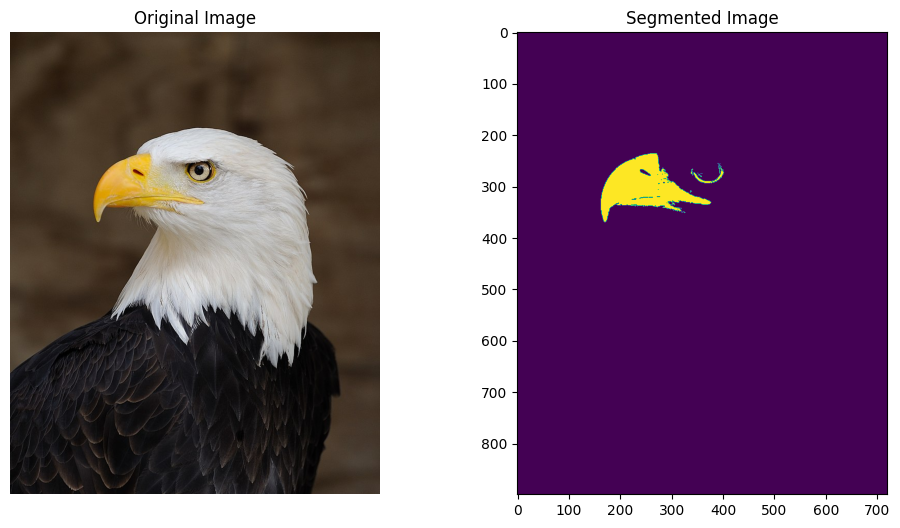

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Carregar a imagem original
img_path = '/content/image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg'
original_img = Image.open(img_path)

# Converter a imagem para o espaço de cores RGB e obter os canais
img_rgb = original_img.convert('RGB')
r, g, b = img_rgb.split()

# Converter os canais para arrays numpy e calcular a distância euclidiana para o amarelo (255, 255, 0)
r_array = np.array(r, dtype=np.float32)
g_array = np.array(g, dtype=np.float32)
b_array = np.array(b, dtype=np.float32)
yellow = np.array([255, 255, 0], dtype=np.float32)
distances = np.sqrt((r_array - yellow[0])**2 + (g_array - yellow[1])**2 + (b_array - yellow[2])**2)

# Distância de limiar é a distância entre (0,0,0) e (100,100,100)
threshold_distance = np.sqrt((100**2) * 3)

# Máscara para segmentação do bico baseado na distância de limiar
mask = distances <= threshold_distance

# Calcular a média das distâncias dos pixels dentro da região de limiar
mean_distance_within_threshold = distances[mask].mean()
print(f"Mean distance within threshold: {mean_distance_within_threshold}")

# Aplicar máscara na imagem
segmented_img = np.zeros_like(r_array)
segmented_img[mask] = 255

# Converter array segmentado de volta para imagem
segmented_img = Image.fromarray(segmented_img.astype(np.uint8))

# Mostrar a imagem original e a segmentada lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Imagem original
axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Imagem segmentada
axs[1].imshow(segmented_img)
axs[1].set_title('Segmented Image')
axs[0].axis('off')
